In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
def convertion(results):
    new_results = results.copy()
    
    # String to dictionary
    new_results['hyperparameters'] = new_results['hyperparameters'].map(ast.literal_eval)
    
    # Sort
    new_results = new_results.sort_values('score', ascending = False).reset_index(drop = True)
    
    print('The highest cross validation ROC_AUC from random forest is {:.5f} found on iteration {}'.format(new_results['score'][0], new_results['iteration'][0]))
    
    best_param = new_results['hyperparameters'][0]
    
    hyp_df = pd.DataFrame()
    
    hyp_df['iteration'] = new_results['iteration']
    hyp_df['score'] = new_results['score']
    
    return best_param, hyp_df

In [3]:
rf_results = pd.read_csv('Automated_Tuning_py.csv')
best_param, hyp_df = convertion(rf_results)

The highest cross validation ROC_AUC from random forest is 0.75287 found on iteration 45


In [6]:
rf_results_rs = pd.read_csv('RandomSearch_Tuning_RF.csv')
best_param_rs, hyp_df_rs = convertion(rf_results_rs)

The highest cross validation ROC_AUC from random forest is 0.75114 found on iteration 32


In [8]:
hyp_df['Search'] = 'Bayesian'
hyp_df_rs['Search'] = 'Random'
hyp_df_all = pd.concat([hyp_df, hyp_df_rs], ignore_index = True)

In [10]:
hyp_df_all.head()

,iteration,score,Search
0,45,0.752870,Bayesian
1,96,0.752461,Bayesian
2,66,0.752178,Bayesian
3,95,0.752126,Bayesian
4,64,0.752089,Bayesian


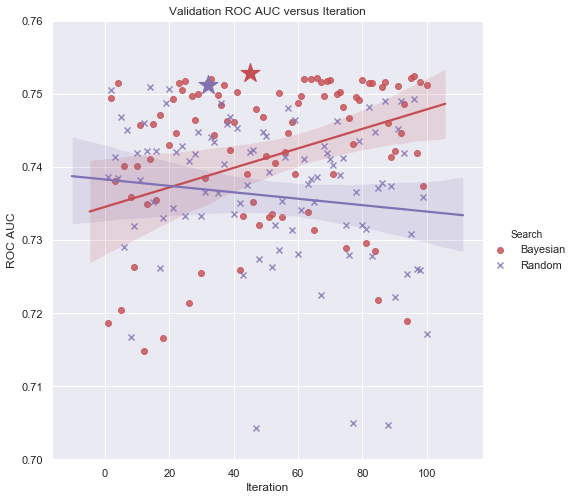

In [21]:
# Plot the score change through iterations
sns.set()
sns.lmplot('iteration', 'score', hue = 'Search', palette = dict(Bayesian='r', Random='m'), 
           markers=["o", "x"], data = hyp_df_all, height = 7)
plt.scatter(hyp_df['iteration'][0], hyp_df['score'][0], marker = '*', s = 400, c = 'r')
plt.scatter(hyp_df_rs['iteration'][0], hyp_df_rs['score'][0], marker = '*', s = 400, c = 'm')
plt.ylim([0.7, 0.76])
plt.xlabel('Iteration')
plt.ylabel('ROC AUC')
plt.title("Validation ROC AUC versus Iteration")
plt.show()

In [17]:
import pickle
with open('RF_best_param.pkl', 'wb') as file:
    pickle.dump(best_param, file)